In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [2]:

iris_data = load_iris()
print(iris_data.data.shape)



(150, 4)


In [4]:
print(iris_data.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [10]:
## Converting data Into an DataFrame 

df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3



### KMeans Clustering

KMeans is an unsupervised clustering algorithm that partitions data into K clusters by minimizing the distance between points within a cluster.

Why suitable for Iris dataset?

The Iris dataset has natural grouping tendencies (species) that KMeans can discover based on feature similarities.


In [11]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df)

C:\Users\MOHAMMED YAZIN N\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\MOHAMMED YAZIN N\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\MOHAMMED YAZIN N\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\MOHAMMED YAZIN N\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fd

KMeans(n_clusters=4, random_state=42)

In [13]:
labels = kmeans.labels_
print(labels)
df['Cluster'] = labels

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2 2 3 0 3 0 3 3 2 3 3 3 0
 0 3 0 0 0 0 3 3 0 3 0 3 0 3 3 0 0 0 3 3 3 0 0 0 3 3 0 0 3 3 0 0 3 3 0 0 0
 0 0]


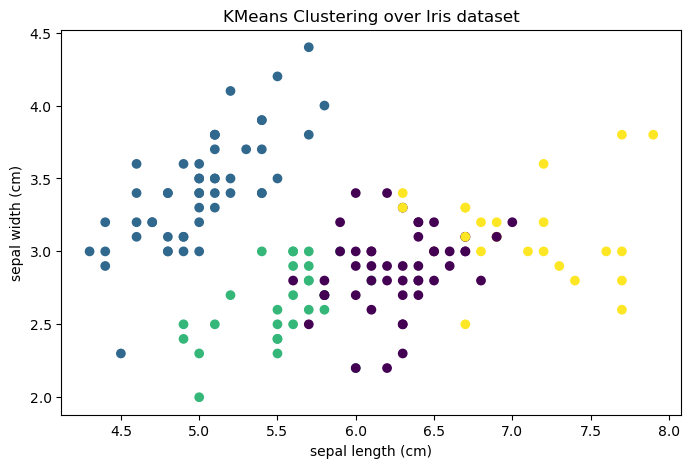

In [21]:
# Visualize clusters 
plt.figure(figsize=(8,5))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=labels)
plt.xlabel(iris_data.feature_names[0])
plt.ylabel(iris_data.feature_names[1])
plt.title("KMeans Clustering over Iris dataset")
plt.show()




## Hierarchical Clustering

    Hierarchical clustering builds a tree (dendrogram) of clusters by either:

    Agglomerative (bottom-up): start with individual points, merge closest pairs iteratively.

    Divisive (top-down): start with all points, split iteratively.

    It does not require specifying number of clusters initially, unlike KMeans.

Why suitable for Iris dataset?

Hierarchical clustering can reveal nested cluster structures in data and is useful when the number of clusters is uncertain or when we need a dendrogram for interpretability.


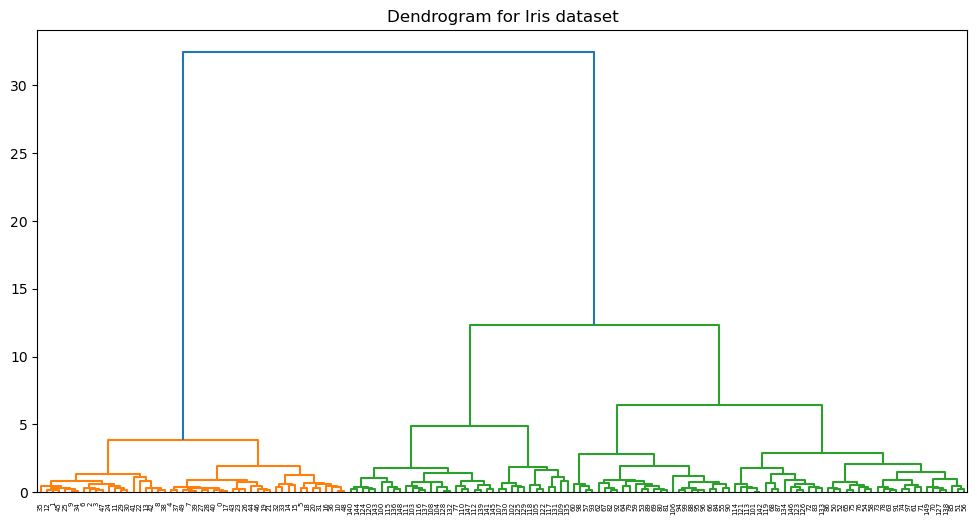

In [22]:
# Performing hierarchical clustering using 'ward' linkage
linked = linkage(df.iloc[:,:4], method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked)
plt.title("Dendrogram for Iris dataset")
plt.show()



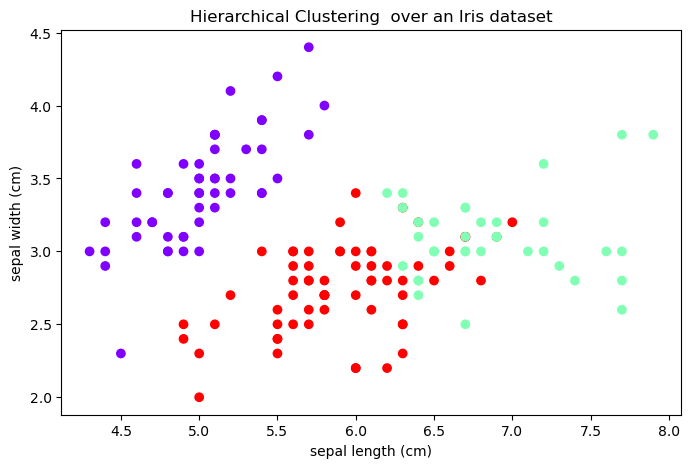

In [26]:


labels_hier = fcluster(linked, 3, criterion='maxclust')

# Visualize clusters using first two features
plt.figure(figsize=(8,5))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=labels_hier, cmap='rainbow')
plt.xlabel(iris_data.feature_names[0])
plt.ylabel(iris_data.feature_names[1])
plt.title("Hierarchical Clustering  over an Iris dataset")
plt.show()

